In [85]:
import pandas as pd
import numpy as np
import ast
!pwd

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

# plt.style.use('QC_publication')
# sns.axes_style("darkgrid")
# This just tells Jupyter to plot our figures as output using the widget
%matplotlib inline 
# if matplotlib widget is not installed (it makes the plot interactive) you can use %matplotlib inline instead for static plots
matplotlib.matplotlib_fname()

/exports/csce/datastore/geos/users/s2135982/rivertools/mlfluv/script


'/exports/csce/datastore/geos/users/s2135982/miniconda/envs/LSDTTtest/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [86]:
data_path = '../exp_data_fixed.csv'

df = pd.read_csv(data_path)

df[['log_num', 'tune_log_num']] = df[['log_num', 'tune_log_num']].astype(int)

# Convert the 'Class wise IoU' column back to list of floats instead of a string
df['Class wise IoU'] = df['Class wise IoU'].apply(ast.literal_eval) 
print(df['Class wise IoU'][1])

# print(df['Class wise IoU'].head(2))

[0.0, 0.9153899427117973, 0.7031360852307287, 0.837030225375603, 0.0, 0.0, 0.45408872468718164]


In [87]:
df.sort_values(by=['log_num', 'tune_log_num', 'distill_lamda', 'temperature'])

,log_num,which_label,weights,tune_log_num,distill_lamda,temperature,Mean IoU,Micro IoU,Macro IoU,Accuracy,Precision,Class wise IoU
1,1001,ESRI,inverse_log,1,0.0,1.0,0.416,0.844,0.411,0.976,0.915,"[0.0, 0.9153899427117973, 0.7031360852307287, ..."
12,1001,ESRI,inverse_log,2,0.0,0.1,0.417,0.842,0.415,0.976,0.914,"[0.0, 0.9121360515726024, 0.6953245169129865, ..."
19,1001,ESRI,inverse_log,3,0.0,0.5,0.444,0.846,0.470,0.976,0.916,"[0.0, 0.9077670208339034, 0.6848213113587478, ..."
20,1001,ESRI,inverse_log,4,0.0,2.0,0.475,0.842,0.484,0.975,0.914,"[0.0, 0.907280026633164, 0.6814200014903627, 0..."
21,1001,ESRI,inverse_log,5,0.0,10.0,0.414,0.835,0.407,0.974,0.910,"[0.0, 0.9042994055254706, 0.6743109920929218, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3002,ESAWC,inverse_count,22,1.0,1.0,0.214,0.638,0.220,0.937,0.779,"[0.0, 0.7392220616340637, 0.012683488835845592..."
145,3002,ESAWC,inverse_count,23,1.0,0.1,0.142,0.583,0.144,0.925,0.737,"[0.0, 0.7094986907367049, 0.06104952320456505,..."
146,3002,ESAWC,inverse_count,24,1.0,0.5,0.171,0.599,0.174,0.928,0.749,"[0.0, 0.7144840577553059, 0.00619892331065032,..."
147,3002,ESAWC,inverse_count,25,1.0,2.0,0.233,0.685,0.243,0.947,0.813,"[0.0, 0.8011895085203237, 0.2519480292139382, ..."


In [88]:
# Define class names and their corresponding indices
class_names = ['tree IoU', 'short vegetation IoU', 'water IoU', 'urban IoU', 'bare ground IoU', 'fluvial sediment IoU']

# Function to extract IoU values for each class
def extract_iou_values(iou_list):
    result = {}
    for i, class_name in enumerate(class_names, start=1):
        if i < len(iou_list):
            result[class_name] = iou_list[i]
        else:
            result[class_name] = np.nan
    return result

# Apply the function to each row and create new columns
iou_values = df['Class wise IoU'].apply(extract_iou_values)
iou_df = pd.DataFrame(iou_values.tolist())

# Concatenate the original DataFrame with the new columns
df = pd.concat([df, iou_df], axis=1)

# rename Mean IoU to mean IoU
df.rename(columns={'Mean IoU': 'mean IoU', 'distill_lamda':'distill lamda'}, inplace=True)
df

,log_num,which_label,weights,tune_log_num,distill lamda,temperature,mean IoU,Micro IoU,Macro IoU,Accuracy,Precision,Class wise IoU,tree IoU,short vegetation IoU,water IoU,urban IoU,bare ground IoU,fluvial sediment IoU
0,1001,ESRI,inverse_log,25,1.00,10.0,0.499,0.868,0.492,0.976,0.929,"[0.0, 0.9252935384881907, 0.7428742435471765, ...",0.925294,0.742874,0.872361,0.000000,0.451173,NaN
1,1001,ESRI,inverse_log,1,0.00,1.0,0.416,0.844,0.411,0.976,0.915,"[0.0, 0.9153899427117973, 0.7031360852307287, ...",0.915390,0.703136,0.837030,0.000000,0.000000,0.454089
2,1001,ESRI,inverse_log,10,0.25,10.0,0.372,0.832,0.375,0.974,0.908,"[0.0, 0.90312027150187, 0.6674637578684708, 0....",0.903120,0.667464,0.848046,0.000000,0.001176,0.182621
3,1001,ESRI,inverse_log,11,0.50,1.0,0.341,0.823,0.340,0.972,0.903,"[0.0, 0.8951115119046178, 0.6533844988921593, ...",0.895112,0.653384,0.840803,0.000000,0.000000,0.000063
4,1001,ESRI,inverse_log,12,0.50,0.1,0.341,0.822,0.342,0.972,0.902,"[0.0, 0.8889798908398069, 0.6502622844844029, ...",0.888980,0.650262,0.849794,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,3002,ESAWC,inverse_count,5,0.00,2.0,0.349,0.787,0.368,0.966,0.881,"[0.0, 0.8706197290584958, 0.6349860273558517, ...",0.870620,0.634986,0.688871,0.250086,0.000000,0.000000
152,3002,ESAWC,inverse_count,6,0.00,10.0,0.359,0.787,0.385,0.966,0.881,"[0.0, 0.8707560633790904, 0.6186940267168243, ...",0.870756,0.618694,0.669829,0.354786,0.000000,0.000000
153,3002,ESAWC,inverse_count,7,0.25,1.0,0.214,0.643,0.220,0.938,0.782,"[0.0, 0.7471071362495423, 0.03593445863446285,...",0.747107,0.035934,0.714304,0.000000,0.000000,0.000041
154,3002,ESAWC,inverse_count,8,0.25,0.1,0.194,0.636,0.193,0.936,0.777,"[0.0, 0.7568607507080868, 0.21632032959625638,...",0.756861,0.216320,0.381568,0.000000,0.000000,0.000006


In [89]:
# Select rows where 'fluvial sediment' IoU is NaN
init_df = df[df['fluvial sediment IoU'].isna()]

# Update 'tune_log_num' to 0 for these selected rows to represent these models are the initial models
df.loc[init_df.index, 'tune_log_num'] = 0
df.loc[init_df.index, 'temperature'] = 1
df.loc[init_df.index, 'distill lamda'] = 0

# Check errors in tune log number, temperature and lamda
df_label = df[df['which_label']=='DW'].sort_values(by=['log_num', 'tune_log_num', 'distill lamda', 'temperature'])
# df_label[['log_num', 'tune_log_num', 'distill lamda', 'temperature', 'Mean IoU']]


In [90]:
# Fix the tune log number jump from 0 to 2. The correct version should be 0 to 25 continuous intergers
# Check if 1 is missing in the 'tune_log_num' column

def fix_tune_log_jump(log_number:int):
    df_log_number = df[df['log_num'] == log_number]

    if 1 not in df_log_number['tune_log_num'].values:
        # Shift values 2-26 to 1-25 in the filtered dataframe
        df_log_number.loc[df_log_number['tune_log_num'] > 1, 'tune_log_num'] -= 1
        # Update the original dataframe with the modified values
        df.loc[df['log_num'] == log_number, 'tune_log_num'] = df_log_number['tune_log_num']

fix_tune_log_jump(2002)
fix_tune_log_jump(3001)
fix_tune_log_jump(3002)

# Display the dataframe
# print(df[df['log_num']==3001])

In [91]:
# Find best models of both initial train and fine tune
best_miou_idx = df.groupby('which_label')['mean IoU'].idxmax()
best_mIoU_param = df.loc[best_miou_idx].sort_values(by=['log_num'])
# print(best_model_param)
print(best_mIoU_param[['log_num', 'tune_log_num', 'distill lamda', 'temperature', 'mean IoU', 'water IoU', 'bare ground IoU', 'fluvial sediment IoU']])

     log_num  tune_log_num  distill lamda  temperature  mean IoU  water IoU  \
26      1002             0            0.0          1.0     0.542   0.835017   
78      2002             0            0.0          1.0     0.464   0.853746   
104     3001             0            0.0          1.0     0.411   0.824797   

     bare ground IoU  fluvial sediment IoU  
26          0.375404                   NaN  
78          0.291854                   NaN  
104         0.000000                   NaN  


In [92]:
# Find best models of fine tune only
# Exclude the initial trained models
filtered_df = df[~df['fluvial sediment IoU'].isna()]

best_miou_idx = filtered_df.groupby('which_label')['mean IoU'].idxmax()
best_mIoU_param = filtered_df.loc[best_miou_idx].sort_values(by=['log_num'])
# print(best_model_param)
print(best_mIoU_param[['log_num', 'tune_log_num', 'distill lamda', 'temperature', 'mean IoU', 'water IoU', 'bare ground IoU', 'fluvial sediment IoU']])

     log_num  tune_log_num  distill lamda  temperature  mean IoU  water IoU  \
49      1002             7           0.25          0.1     0.501   0.837815   
100     2002             5           0.00         10.0     0.457   0.836788   
150     3002             3           0.00          0.5     0.371   0.679868   

     bare ground IoU  fluvial sediment IoU  
49          0.000000              0.457098  
100         0.015973              0.476904  
150         0.000000              0.000000  


In [139]:
# Find best models of predicting water. Exclude the initial trained models
best_water_idx = filtered_df.groupby('which_label')['water IoU'].idxmax()
best_water_param = filtered_df.loc[best_water_idx].sort_values(by=['log_num'])
print(best_water_param[['log_num', 'tune_log_num', 'distill lamda', 'temperature', 'mean IoU', 'water IoU', 'bare ground IoU', 'fluvial sediment IoU']])

     log_num  tune_log_num  distill lamda  temperature  mean IoU  water IoU  \
11      1001            19           0.75          2.0     0.407   0.857322   
40      1002            21           1.00          1.0     0.293   0.854401   
73      2001             5           0.00         10.0     0.385   0.840798   
102     2002             7           0.25          0.1     0.433   0.838557   
119     3001            22           1.00          0.1     0.333   0.763697   
133     3002            11           0.50          1.0     0.219   0.756924   

     bare ground IoU  fluvial sediment IoU  
11          0.000000              0.422830  
40          0.000000              0.000069  
73          0.000000              0.484286  
102         0.000272              0.321508  
119         0.000000              0.000254  
133         0.000000              0.000015  


In [94]:
# Find best models of predicting sediment. Exclude the initial trained models
best_water_idx = df.groupby('which_label')['fluvial sediment IoU'].idxmax()
best_water_param = df.loc[best_water_idx].sort_values(by=['log_num'])
print(best_water_param[['log_num', 'tune_log_num', 'distill lamda', 'temperature', 'mean IoU', 'water IoU', 'urban IoU', 'bare ground IoU', 'fluvial sediment IoU']])

     log_num  tune_log_num  distill lamda  temperature  mean IoU  water IoU  \
47      1002             5           0.00         10.0     0.452   0.800636   
72      2001             4           0.00          2.0     0.383   0.830407   
142     3002            19           0.75          2.0     0.220   0.471257   

     urban IoU  bare ground IoU  fluvial sediment IoU  
47    0.226746         0.096410              0.551554  
72    0.000000         0.006314              0.488580  
142   0.000000         0.000000              0.016534  


In [95]:
# Find best models of predicting bare ground. Exclude the initial trained models
best_water_idx = filtered_df.groupby('which_label')['bare ground IoU'].idxmax()
best_water_param = filtered_df.loc[best_water_idx].sort_values(by=['log_num'])
print(best_water_param[['log_num', 'tune_log_num', 'distill lamda', 'temperature', 'mean IoU', 'water IoU','urban IoU', 'bare ground IoU', 'fluvial sediment IoU']])

     log_num  tune_log_num  distill lamda  temperature  mean IoU  water IoU  \
47      1002             5           0.00         10.0     0.452   0.800636   
99      2002             4           0.00          2.0     0.430   0.823298   
143     3002            20           0.75         10.0     0.220   0.594977   

     urban IoU  bare ground IoU  fluvial sediment IoU  
47    0.226746         0.096410              0.551554  
99    0.324462         0.043452              0.328851  
143   0.000000         0.000082              0.000000  


In [96]:
# Find best models of predicting bare ground. Exclude the initial trained models
best_water_idx = filtered_df.groupby('which_label')['bare ground IoU'].idxmax()
best_water_param = filtered_df.loc[best_water_idx].sort_values(by=['log_num'])
print(best_water_param[['log_num', 'tune_log_num', 'distill lamda', 'temperature', 'mean IoU', 'water IoU','urban IoU', 'bare ground IoU', 'fluvial sediment IoU']])

     log_num  tune_log_num  distill lamda  temperature  mean IoU  water IoU  \
47      1002             5           0.00         10.0     0.452   0.800636   
99      2002             4           0.00          2.0     0.430   0.823298   
143     3002            20           0.75         10.0     0.220   0.594977   

     urban IoU  bare ground IoU  fluvial sediment IoU  
47    0.226746         0.096410              0.551554  
99    0.324462         0.043452              0.328851  
143   0.000000         0.000082              0.000000  


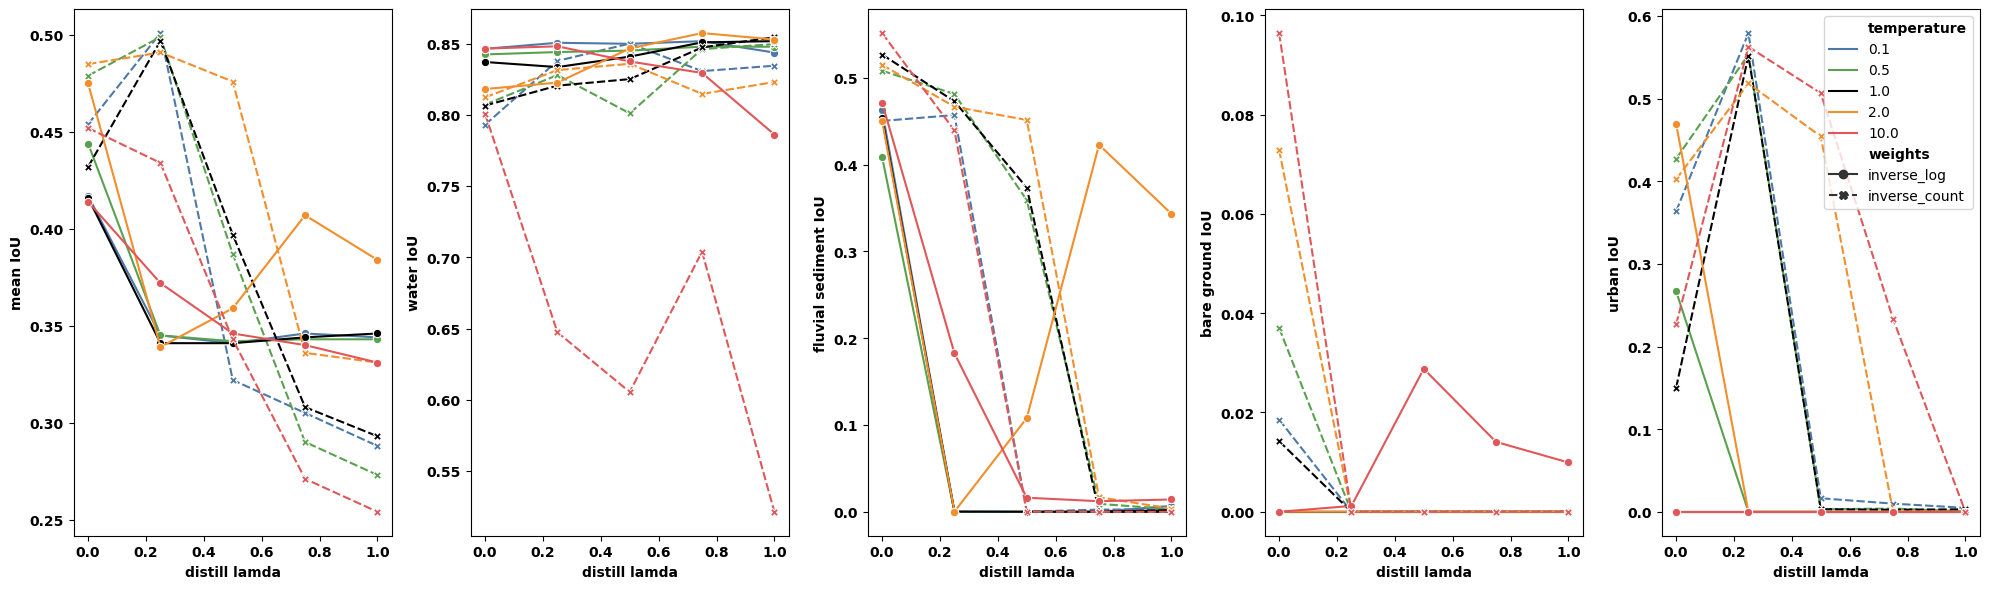

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sub_df = filtered_df[filtered_df['which_label'] == 'ESRI']
df1 = sub_df[sub_df['weights'] == 'inverse_log']
df2 = sub_df[sub_df['weights'] == 'inverse_count']

# Define a custom color palette for 'temperature' categories
temperature_palette = ['#4e79a7', '#59a14f','black', '#f28e2b', '#e15759']
sns.set_palette(temperature_palette)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

for i, col in enumerate(['mean IoU', 'water IoU', 'fluvial sediment IoU', 'bare ground IoU','urban IoU']):
    sns.lineplot(data=sub_df, x='distill lamda', y=col, hue='temperature', style='weights',
                 markers=True, ax=axes[i], palette=temperature_palette)
    # axes[i].set_title(f'{col}', fontweight='bold')
    axes[i].set_xlabel('distill lamda', fontweight='bold')
    axes[i].set_ylabel(col, fontweight='bold')
    axes[i].legend().set_visible(False)  # Remove individual legends

    # Make the tick labels bold
    for tick in axes[i].get_xticklabels():
        tick.set_fontweight('bold')
    for tick in axes[i].get_yticklabels():
        tick.set_fontweight('bold')

# Create a common legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
legend = plt.legend(handles, labels, title=False, loc='upper right')



# Set the legend labels to bold
for text in legend.get_texts():
    if text.get_text() in ['temperature', 'weights']: 
        text.set_fontweight('bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


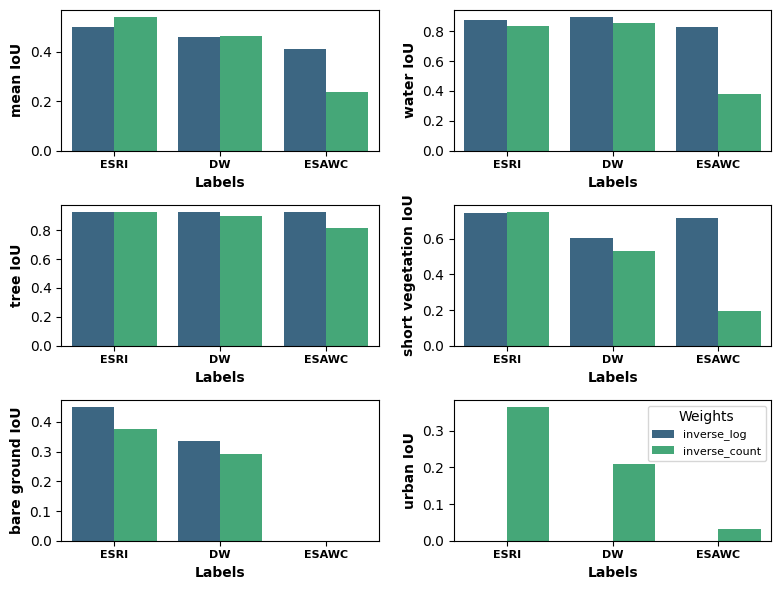

In [137]:
# Plot the accuracy of initial model per land cover class

df_init = df[df['tune_log_num']==0]
# print(df_init)

# Define order of labels and weights
labels_order = ['ESRI', 'DW', 'ESAWC']
weights_order = ['inverse_log', 'inverse_count']

# Define IoU metrics to plot
iou_metrics = ['mean IoU', 'water IoU', 'tree IoU', 'short vegetation IoU', 'bare ground IoU', 'urban IoU']

# Create subplots
num_plots = len(iou_metrics)
cols = 2  # Number of columns in the subplot grid
rows = (num_plots + 1) // cols  # Number of rows in the subplot grid

fig, axes = plt.subplots(rows, cols, figsize=(8, 6))

# Flatten axes if rows > 1
axes = axes.flatten()

for i, metric in enumerate(iou_metrics):
    # Plot grouped bar plot for each metric
    sns.barplot(data=df_init, x='which_label', y=metric, hue='weights',
                order=labels_order, hue_order=weights_order, palette='viridis', ax=axes[i])
    # axes[i].set_title(metric, fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Labels', fontsize=10, fontweight='bold')
    axes[i].set_ylabel(metric, fontsize=10, fontweight='bold')
    axes[i].set_xticklabels(labels_order, fontsize=8, fontweight='bold')

    if i == cols*rows - 1:
        axes[i].legend(title='Weights', fontsize=8, title_fontsize='10', loc='upper right')
    else: 
        axes[i].legend().set_visible(False) 

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [218]:
def plot_group_IoUs(dataframe, ignore_sedi=True, show_legend=True):

    # Filter dataframes based on weights
    df_inverse_log = dataframe[dataframe['weights'] == 'inverse_log']
    df_inverse_count = dataframe[dataframe['weights'] == 'inverse_count']

    landcover_pallete = {
        'mean IoU': 'black',
        'water IoU': '#4183c4',
        'tree IoU': '#009600',
        'short vegetation IoU': '#ccff99',
        'bare ground IoU': '#b4b4b4',
        'urban IoU': '#fa0000',
        'fluvial sediment IoU': '#ffbb22'
    }
    
    wanted_columns = ['which_label', 'mean IoU', 'tree IoU','short vegetation IoU','water IoU', 'urban IoU', 'bare ground IoU', 'fluvial sediment IoU']
    
    if ignore_sedi:
        wanted_columns = wanted_columns[:-1]
    print(wanted_columns)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

    # Function to add labels on top of bars
    def add_bar_labels(ax):
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()+0.02),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points', rotation=90)    

    # Plot first subplot (inverse_log)
    ax1 = df_inverse_log[wanted_columns].plot.bar(rot=0, color=landcover_pallete, ax=axes[0], legend=False, alpha=0.8)

    # ax1.set_title('Using inverse-log weights', fontsize=20)
    ax1.set_xticklabels(df_inverse_log['which_label'], fontweight='bold', fontsize=20)
    ax1.set_ylabel('IoU',fontsize=20, fontweight='bold')

    # Set y-axis tick size to 20
    ax1.tick_params(axis='y', which='major', labelsize=20)

    add_bar_labels(ax1)  # Add labels to the bars

    # Plot second subplot (inverse_count)
    ax2 = df_inverse_count[wanted_columns].plot.bar(rot=0, color=landcover_pallete, ax=axes[1], alpha=0.8, legend=show_legend)

    ax2.set_xticklabels(df_inverse_count['which_label'], fontweight='bold', fontsize=20)
    # ax2.set_title('Using inverse-count weights', fontsize=20)

    # Remove top and right spines (outline) from both subplots
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    add_bar_labels(ax2)  # Add labels to the bars

    # # Determine the comparison line value (e.g., mean of values)
    # water _value = np.mean(values1 + values2)

    # # Draw a horizontal line on both subplots at the comparison value
    # ax1.axhline(comparison_value, color='r', linestyle='--', label='Comparison Line')
    # ax2.axhline(comparison_value, color='r', linestyle='--', label='Comparison Line')

    # Show the plot
    plt.tight_layout()
    plt.show()

['which_label', 'mean IoU', 'tree IoU', 'short vegetation IoU', 'water IoU', 'urban IoU', 'bare ground IoU']


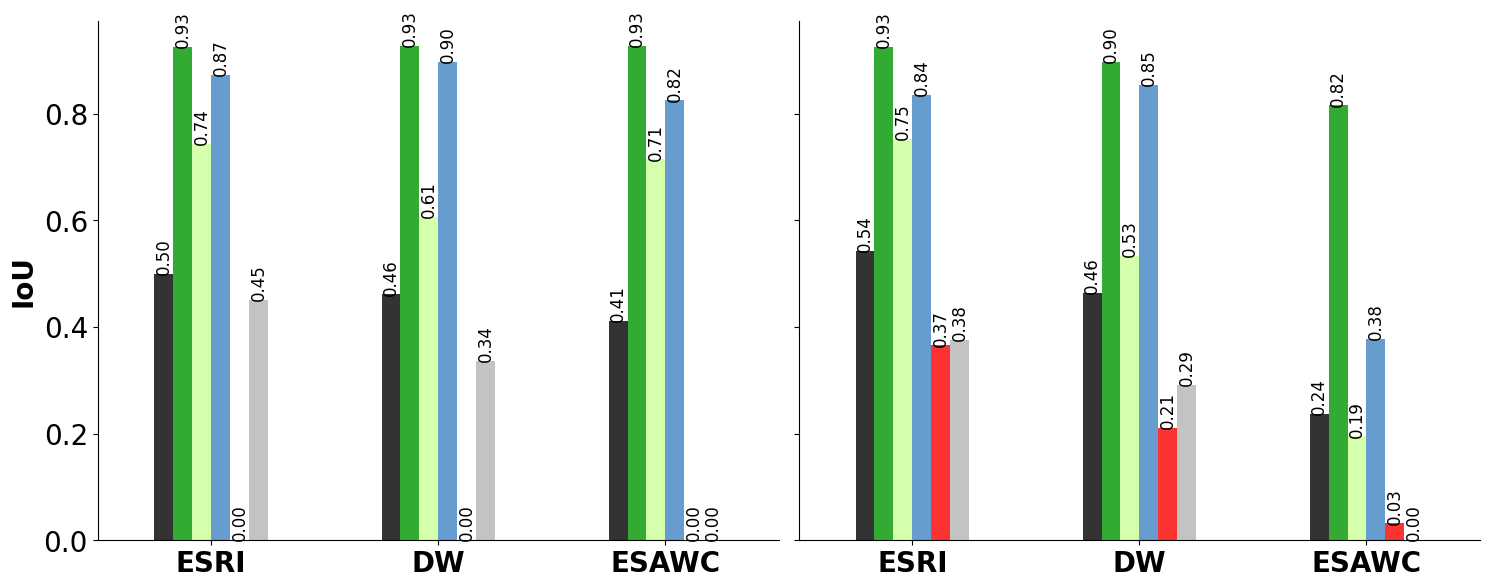

In [219]:
plot_group_IoUs(df_init, show_legend=False)

In [144]:
# Find best models of highest mean IoU.
# Find best models of fine tune only. Exclude the initial trained models
df_ft = df[~df['fluvial sediment IoU'].isna()]

best_miou_idx = df_ft.groupby(by=['which_label', 'weights'])['mean IoU'].idxmax()
df_best_miou = df_ft.loc[best_miou_idx].sort_values(by=['log_num'])

best_water_idx = df_ft.groupby(by=['which_label', 'weights'])['water IoU'].idxmax()
df_best_water = df_ft.loc[best_water_idx].sort_values(by=['log_num'])

best_sedi_idx = df_ft.groupby(by=['which_label', 'weights'])['fluvial sediment IoU'].idxmax()
df_best_sedi = df_ft.loc[best_sedi_idx].sort_values(by=['log_num'])

best_bare_idx = df_ft.groupby(by=['which_label', 'weights'])['bare ground IoU'].idxmax()
df_best_bare = df_ft.loc[best_bare_idx].sort_values(by=['log_num'])

best_urban_idx = df_ft.groupby(by=['which_label', 'weights'])['urban IoU'].idxmax()
df_best_urban = df_ft.loc[best_urban_idx].sort_values(by=['log_num'])

     log_num which_label        weights  tune_log_num  distill lamda  \
20      1001        ESRI    inverse_log             4           0.00   
49      1002        ESRI  inverse_count             7           0.25   
73      2001          DW    inverse_log             5           0.00   
100     2002          DW  inverse_count             5           0.00   
115     3001       ESAWC    inverse_log             1           0.00   
150     3002       ESAWC  inverse_count             3           0.00   

     temperature  mean IoU  Micro IoU  Macro IoU  Accuracy  Precision  \
20           2.0     0.475      0.842      0.484     0.975      0.914   
49           0.1     0.501      0.855      0.503     0.978      0.922   
73          10.0     0.385      0.794      0.387     0.967      0.885   
100         10.0     0.457      0.820      0.463     0.972      0.901   
115          1.0     0.336      0.826      0.333     0.973      0.904   
150          0.5     0.371      0.805      0.394     0.96

['which_label', 'mean IoU', 'tree IoU', 'short vegetation IoU', 'water IoU', 'urban IoU', 'bare ground IoU', 'fluvial sediment IoU']


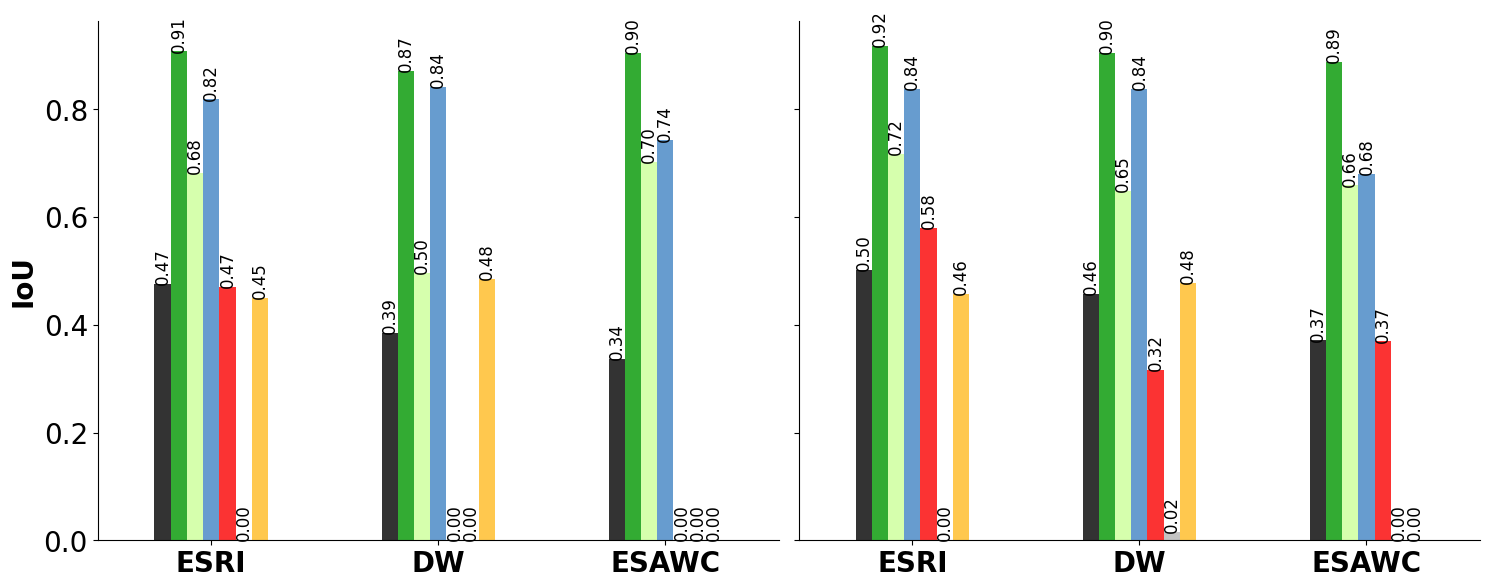

In [220]:
plot_group_IoUs(df_best_miou, ignore_sedi=False, show_legend=False)

['which_label', 'mean IoU', 'tree IoU', 'short vegetation IoU', 'water IoU', 'urban IoU', 'bare ground IoU', 'fluvial sediment IoU']


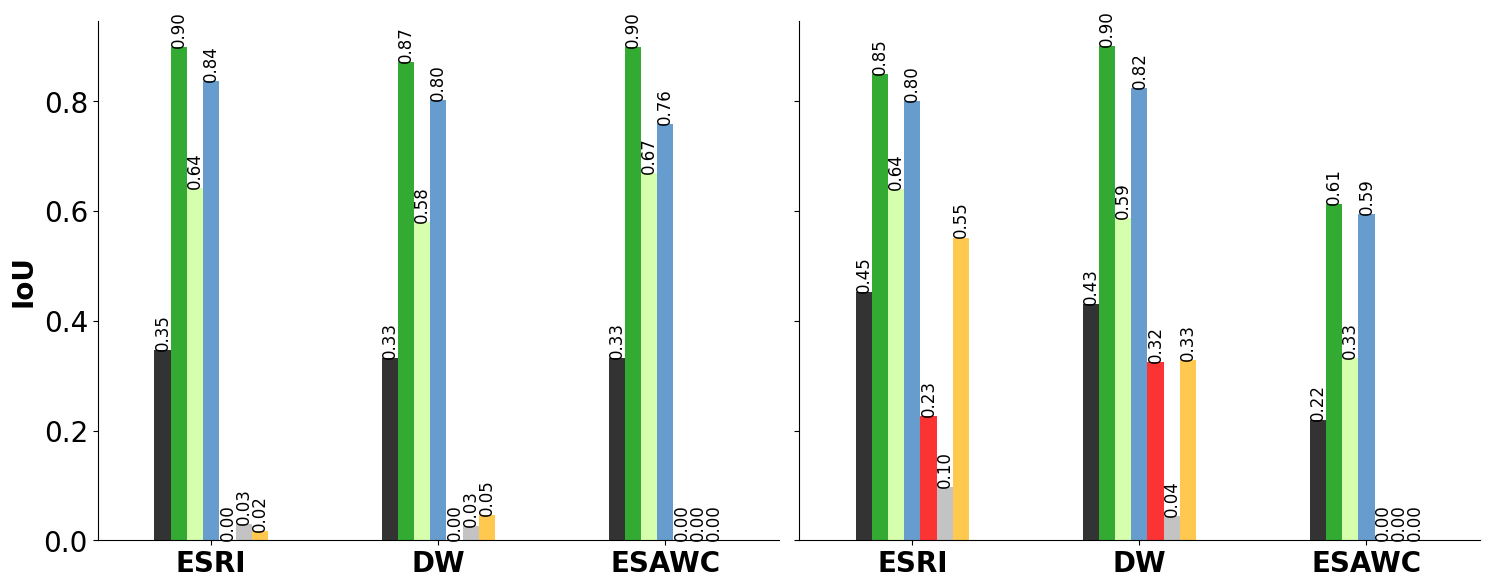

In [224]:
plot_group_IoUs(df_best_bare, ignore_sedi=False,show_legend=False)